In [1]:
import sqlite3
con = sqlite3.connect("CLF19_5M.db")

In [22]:
import pandas as pd
df = pd.read_sql("SELECT * FROM candles where day > '20181001' order by dt", con, index_col='dt')
# df = pd.read_sql("SELECT * FROM candles where day > '20180710' order by dt", con, index_col='dt', parse_dates={'dt'})

In [27]:
df

,open,high,low,close,volume,day,variation,up
dt,,,,,,,,
20181002070000,75.02,75.09,75.02,75.06,18,20181002,0.04,True
20181002070500,75.00,75.00,75.00,75.00,2,20181002,0.00,False
20181002071500,75.03,75.05,75.03,75.05,11,20181002,0.02,True
20181002073500,75.09,75.10,75.09,75.10,2,20181002,0.01,True
20181002074500,75.07,75.07,75.06,75.06,2,20181002,-0.01,False
20181002075000,75.06,75.08,75.06,75.08,12,20181002,0.02,True
20181002075500,75.08,75.09,75.07,75.07,21,20181002,-0.01,False
20181002080500,75.08,75.11,75.08,75.11,7,20181002,0.03,True
20181002081000,75.12,75.13,75.12,75.13,2,20181002,0.01,True


In [26]:
df['variation'] = df.close - df.open
df['up'] = df.close > df.open

In [53]:
#import itertools
#target_index = [[df.index.get_loc(value) - 1, df.index.get_loc(value)] for value in df[(df.variation != 0) & (df.open == df.shift().close) & (df.up != df.shift().up)].index.values]
#target_index = list(itertools.chain(*target_index)))
target_index = [df.index.get_loc(value) for value in df[(df.variation != 0) & (df.open == df.shift().close) & (df.up != df.shift().up)].index.values]

In [54]:
df.iloc[target_index,:].head(10)

,open,high,low,close,volume,day,variation,up
dt,,,,,,,,
20181002075000,75.06,75.08,75.06,75.08,12,20181002,0.02,True
20181002075500,75.08,75.09,75.07,75.07,21,20181002,-0.01,False
20181002164500,75.19,75.30,75.19,75.30,182,20181002,0.11,True
20181002184000,75.01,75.01,74.92,74.93,16,20181002,-0.08,False
20181002185000,74.90,74.95,74.86,74.93,31,20181002,0.03,True
20181002195500,75.05,75.05,75.03,75.03,3,20181002,-0.02,False
20181002203500,75.27,75.27,75.19,75.20,29,20181002,-0.07,False
20181002222000,75.10,75.16,75.10,75.13,68,20181002,0.03,True
20181002223500,75.01,75.13,75.01,75.13,113,20181002,0.12,True


In [62]:
success = 0
fail = 0

for i_base in target_index:
    up = df.iloc[i_base].up
    price = df.iloc[i_base+1].open
    max_revenue = 0
    index_revenue = 0
    max_loss = 0
    index_loss = 0
    
    if i_base > len(df) - 20:
        break
    
    for x in range(12):
        revenue = 0
        loss = 0
        if up:
            revenue = df.iloc[i_base+2+x].high - price
            loss = price - df.iloc[i_base+2+x].low
        else:
            loss = df.iloc[i_base+2+x].high - price
            revenue = price - df.iloc[i_base+2+x].low
        if max_revenue < revenue:
            max_revenue = revenue
            index_revenue = x+1
        if max_loss < loss:
            max_loss = loss
            index_loss = x+1
            
    if max_loss >= 0.1:
        fail += 1
    else:
        success += 1
print('success:', success, ' fail:', fail)

success: 1091  fail: 1733


In [ ]:
def 

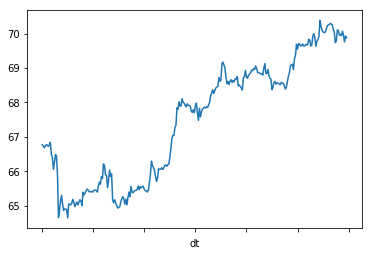

In [6]:
df.loc['20180815070000':].close.plot()

In [71]:
def add_inflection_points(df, range_count=10):
    df_backward_high = df['high'].rolling(range_count, min_periods=1).max()
    df_forward_high = df_backward_high.shift(-1*(range_count-1))
    df['inflection_high'] = (df['high'] >= df_backward_high) & (df['high'] >= df_forward_high)
    df_backward_low = df['low'].rolling(range_count, min_periods=1).min()
    df_forward_low = df_backward_low.shift(-1*(range_count-1))
    df['inflection_low'] = (df['low'] <= df_backward_low) & (df['low'] >= df_forward_low)

In [72]:
add_inflection_points(df)

In [143]:
high_inflections = df[df['inflection_high']]['high'].value_counts()
df_high_inflections = pd.DataFrame({'high_count':high_inflections.values}, index=high_inflections.index)
df_high_inflections['high_volumes'] = df_high_inflections.index.map(lambda i: (lambda price: df[df['high']==price]['volume'].sum())(i))

low_inflections = df[df['inflection_low']]['low'].value_counts()
df_low_inflections = pd.DataFrame({'low_count':low_inflections.values}, index=low_inflections.index)
df_low_inflections['high_volumes'] = df_low_inflections.index.map(lambda i: (lambda price: df[df['low']==price]['volume'].sum())(i))

df_inflections = pd.concat([df_high_inflections, df_low_inflections], axis=1).sort_index(ascending=False)

In [117]:
def price_volumes(price):
    return df[df['high']==price]['volume'].sum()

Int64Index([382, 354, 327, 300, 239, 164, 159], dtype='int64')

In [133]:
for index, row in df_high_inflections.iterrows():
    print(type(index), row)

<class 'float'> high_count    7
Name: 66.81, dtype: int64
<class 'float'> high_count    6
Name: 66.72, dtype: int64
<class 'float'> high_count    3
Name: 66.83, dtype: int64
<class 'float'> high_count    2
Name: 66.79, dtype: int64
<class 'float'> high_count    1
Name: 66.8, dtype: int64
<class 'float'> high_count    1
Name: 66.82, dtype: int64
<class 'float'> high_count    1
Name: 66.77, dtype: int64


In [76]:
df[df['inflection_low']]['low'].value_counts()

66.75    13
66.76    12
66.78     6
66.66     5
66.67     5
66.77     5
66.71     3
66.80     3
66.79     3
66.74     2
66.69     2
66.73     2
66.68     1
66.51     1
Name: low, dtype: int64

In [82]:
df[df['high'] == 66.81]['volume']

dt
20180815074100    19
20180815074500    16
20180815074600    17
20180815074700    20
20180815074800    17
20180815074900    14
20180815075000     6
20180815075100    47
20180815075200    19
20180815075400     3
20180815080800    44
20180815080900    50
20180815081400    11
20180815081500    16
20180815081700     8
20180815081900     3
20180815082000     2
20180815082100     6
20180815082200     4
20180815082300     5
20180815082400    23
20180815082600    20
20180815082700     6
20180815082800     6
Name: volume, dtype: int64

In [87]:
df[df['inflection_high'] & (df['high']==66.81)]['high'].sum()

467.67

In [144]:
df_inflections

,high_count,high_volumes,low_count,high_volumes
66.83,3.0,327.0,NaN,NaN
66.82,1.0,164.0,NaN,NaN
66.81,7.0,382.0,NaN,NaN
66.80,1.0,239.0,3.0,197.0
66.79,2.0,300.0,3.0,290.0
66.78,NaN,NaN,6.0,533.0
66.77,1.0,159.0,5.0,312.0
66.76,NaN,NaN,12.0,281.0
66.75,NaN,NaN,13.0,214.0
66.74,NaN,NaN,2.0,81.0


In [41]:
df[df['open']==df['close']].index

Int64Index([20180815070300, 20180815070600, 20180815070800, 20180815071200,
            20180815071400, 20180815071600, 20180815071700, 20180815072100,
            20180815072200, 20180815072600,
            ...
            20180901053500, 20180901053700, 20180901053800, 20180901054400,
            20180901054500, 20180901054600, 20180901055000, 20180901055300,
            20180901055500, 20180901055800],
           dtype='int64', name='dt', length=5103)

In [ ]:
for start_dt in df[df['open']==df['close']].index.values:
    df.loc[start_dt:].head(10)[['open','high','low','close']].plot(title=start_dt, style='.')

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


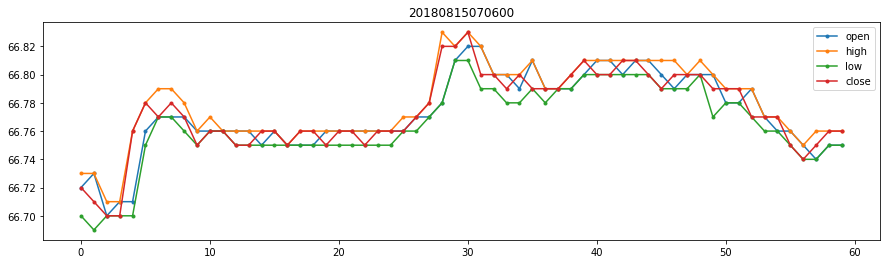

In [47]:
start_dt = '20180815070600'
df.loc[start_dt:].reset_index().head(60)[['open','high','low','close']].plot(title=start_dt, style='.-', figsize=(15,4));

In [19]:
df.loc[start_dt:].head(60)[['open','high','low','close']].reset_index()

,dt,open,high,low,close
0,20180817090000,65.40,65.41,65.39,65.39
1,20180817090100,65.39,65.39,65.37,65.37
2,20180817090200,65.36,65.37,65.36,65.37
3,20180817090300,65.37,65.38,65.37,65.38
4,20180817090400,65.37,65.37,65.36,65.36
5,20180817090500,65.36,65.37,65.36,65.36
6,20180817090600,65.36,65.36,65.35,65.35
7,20180817090700,65.35,65.37,65.33,65.37
8,20180817090800,65.36,65.38,65.36,65.37
9,20180817090900,65.36,65.36,65.34,65.35


In [55]:
df

,open,high,low,close,volume,day
dt,,,,,,
20180815070000,66.62,66.63,66.51,66.59,477,20180815
20180815070100,66.58,66.62,66.58,66.61,140,20180815
20180815070200,66.61,66.70,66.60,66.68,254,20180815
20180815070300,66.68,66.69,66.67,66.68,88,20180815
20180815070400,66.69,66.74,66.69,66.73,168,20180815
20180815070500,66.73,66.73,66.71,66.72,47,20180815
20180815070600,66.72,66.73,66.70,66.72,65,20180815
20180815070700,66.73,66.73,66.69,66.71,42,20180815
20180815070800,66.70,66.71,66.70,66.70,16,20180815


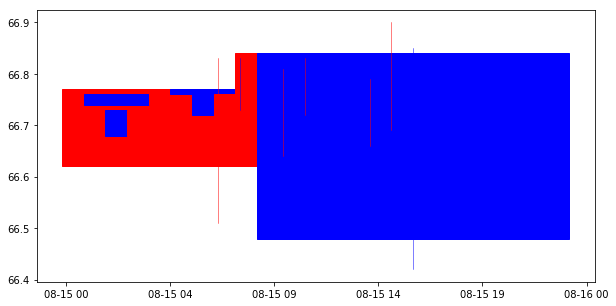

In [79]:
################################################################################################
#	name:	timeseries_OHLC.py
#	desc:	creates OHLC graph
#	date:	2018-06-15
#	Author:	conquistadorjd
################################################################################################
import pandas as pd
# import pandas_datareader as datareader
import matplotlib.pyplot as plt
import datetime
from matplotlib.finance import candlestick_ohlc
# from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

df['Date'] = pd.to_datetime(df.index, format='%Y%m%d%H%M%S')
df["Date"] = df["Date"].apply(mdates.date2num)

# Creating required data in new DataFrame OHLC
ohlc= df.iloc[0:10][['Date', 'open', 'high', 'low','close']].copy()
# In case you want to check for shorter timespan
# ohlc =ohlc.tail(60)

f1, ax = plt.subplots(figsize = (10,5))

# plot the candlesticks
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='red', colordown='blue')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H'))
# Saving image
#plt.savefig('OHLC HDFC.png')

# In case you dont want to save image but just displya it
plt.show()

In [70]:
df.iloc[1:5]

,open,high,low,close,volume,day,Date
dt,,,,,,,
20180815080000,66.76,66.83,66.73,66.74,1022,20180815,736921.333333
20180815090000,66.73,66.75,66.66,66.68,2224,20180815,736921.375000
20180815100000,66.68,66.81,66.64,66.73,3757,20180815,736921.416667
20180815110000,66.74,66.83,66.72,66.77,1835,20180815,736921.458333


In [80]:
import pandas_datareader as datareader
import matplotlib.pyplot as plt
import datetime
#from matplotlib.finance import candlestick_ohlc
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

In [86]:
df['Date'] = pd.to_datetime(df.index, format='%Y%m%d%H%M%S').map(mdates.date2num)
ohlc = df[['Date','open','high','low','close']].iloc[0:10]

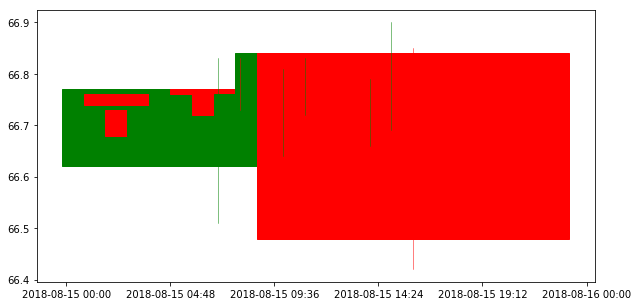

In [89]:
f1, ax = plt.subplots(figsize = (10,5))

# plot the candlesticks
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.show()

In [88]:
ohlc

,Date,open,high,low,close
dt,,,,,
20180815070000,736921.291667,66.62,66.83,66.51,66.77
20180815080000,736921.333333,66.76,66.83,66.73,66.74
20180815090000,736921.375000,66.73,66.75,66.66,66.68
20180815100000,736921.416667,66.68,66.81,66.64,66.73
20180815110000,736921.458333,66.74,66.83,66.72,66.77
20180815120000,736921.500000,66.77,66.81,66.74,66.76
20180815130000,736921.541667,66.76,66.82,66.69,66.72
20180815140000,736921.583333,66.71,66.79,66.66,66.76
20180815150000,736921.625000,66.75,66.90,66.69,66.84
